In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import missingno
import warnings 
warnings.filterwarnings("ignore")

pd.set_option("display.max_rows",None)
pd.set_option("display.max_columns",None)

In [3]:
user=pd.read_csv("G:\\Datasets\\bookcrossing_Recommendation\\BX-Users.csv",error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
books=pd.read_csv("G:\\Datasets\\bookcrossing_Recommendation\\BX-Books.csv",error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')
ratings=pd.read_csv("G:\\Datasets\\bookcrossing_Recommendation\\BX-Book-Ratings.csv",error_bad_lines=False, delimiter=';', encoding = 'ISO-8859-1')

b'Skipping line 6452: expected 8 fields, saw 9\nSkipping line 43667: expected 8 fields, saw 10\nSkipping line 51751: expected 8 fields, saw 9\n'
b'Skipping line 92038: expected 8 fields, saw 9\nSkipping line 104319: expected 8 fields, saw 9\nSkipping line 121768: expected 8 fields, saw 9\n'
b'Skipping line 144058: expected 8 fields, saw 9\nSkipping line 150789: expected 8 fields, saw 9\nSkipping line 157128: expected 8 fields, saw 9\nSkipping line 180189: expected 8 fields, saw 9\nSkipping line 185738: expected 8 fields, saw 9\n'
b'Skipping line 209388: expected 8 fields, saw 9\nSkipping line 220626: expected 8 fields, saw 9\nSkipping line 227933: expected 8 fields, saw 11\nSkipping line 228957: expected 8 fields, saw 10\nSkipping line 245933: expected 8 fields, saw 9\nSkipping line 251296: expected 8 fields, saw 9\nSkipping line 259941: expected 8 fields, saw 9\nSkipping line 261529: expected 8 fields, saw 9\n'


In [4]:
user.head()

,User-ID,Location,Age
0,1,"nyc, new york, usa",NaN
1,2,"stockton, california, usa",18.0
2,3,"moscow, yukon territory, russia",NaN
3,4,"porto, v.n.gaia, portugal",17.0
4,5,"farnborough, hants, united kingdom",NaN


In [5]:
books.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...
2,0060973129,Decision in Normandy,Carlo D'Este,1991,HarperPerennial,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...,http://images.amazon.com/images/P/0060973129.0...
3,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...,http://images.amazon.com/images/P/0374157065.0...
4,0393045218,The Mummies of Urumchi,E. J. W. Barber,1999,W. W. Norton &amp; Company,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...,http://images.amazon.com/images/P/0393045218.0...


In [6]:
ratings.head()

,User-ID,ISBN,Book-Rating
0,276725,034545104X,0
1,276726,0155061224,5
2,276727,0446520802,0
3,276729,052165615X,3
4,276729,0521795028,6


In [7]:
data = pd.merge(books, ratings, on='ISBN', how='left')


In [8]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0


In [9]:
data=pd.merge(data, user, on='User-ID', how='left')

In [10]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,Image-URL-S,Image-URL-M,Image-URL-L,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,http://images.amazon.com/images/P/0195153448.0...,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,http://images.amazon.com/images/P/0002005018.0...,41385.0,0.0,"sudbury, ontario, canada",NaN


In [11]:
data.drop(["Image-URL-S","Image-URL-M","Image-URL-L"],axis=1,inplace=True)

In [12]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa",18.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada",NaN
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada",49.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a",NaN
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada",NaN


In [13]:
#missingno.matrix(data)

In [14]:
data.shape

(1032345, 9)

In [15]:
data["User-ID"].unique().shape

(92107,)

In [16]:
data[data.ISBN=="034545104X"].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location,Age
120097,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,276725.0,0.0,"tyler, texas, usa",NaN
120098,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,2313.0,5.0,"cincinnati, ohio, usa",23.0
120099,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,6543.0,0.0,"strafford, missouri, usa",34.0
120100,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,8680.0,5.0,"st. charles county, missouri, usa",2.0
120101,034545104X,Flesh Tones: A Novel,M. J. Rose,2002,Ballantine Books,10314.0,9.0,"beaverton, oregon, usa",NaN


In [17]:
# For simplification of the problem we gonna drop the age column too

data.drop("Age",axis=1,inplace=True)

In [18]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa"
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada"
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada"
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a"
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada"


## Cleaning the Year Column

In [19]:
data["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [20]:
data[data["Year-Of-Publication"]=="DK Publishing Inc"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
959821,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,169663.0,0.0,"towson, maryland, usa"
959822,078946697X,"DK Readers: Creating the X-Men, How It All Beg...",2000,DK Publishing Inc,http://images.amazon.com/images/P/078946697X.0...,227771.0,7.0,"savion, n/a, israel"
976112,0789466953,"DK Readers: Creating the X-Men, How Comic Book...",2000,DK Publishing Inc,http://images.amazon.com/images/P/0789466953.0...,130571.0,0.0,"summerville, south carolina, usa"


In [21]:
data["Year-Of-Publication"].replace({"DK Publishing Inc":2000},inplace=True)

In [22]:
data["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 0, 1968, 1961, 1958, 1974,
       1976, 1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960,
       1966, 1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954,
       1950, 1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011,
       1925, 1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030,
       1911, 1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934,
       1910, 1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901,
       2010, 1908, 1906, 1935, 1806, 2021, '2000', '1995', '1999', '2004',
       '2003', '1990', '1994', '1986', '1989', '2002', '1981', '1993',
       '1983', '1982', '1976', '1991', '1977', '1998', '1992', '1996',
       '0', '1997', '2001', '1974', '1968', '1987', '1984', '1988',
       '1963', '1956', '1970', '1985', '1978', '1973', '1980'

In [23]:
data[data["Year-Of-Publication"]=="Gallimard"]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
974900,2070426769,"Peuple du ciel, suivi de 'Les Bergers\"";Jean-M...",2003,Gallimard,http://images.amazon.com/images/P/2070426769.0...,137190.0,0.0,"rennes, bretagne, france"


In [24]:
data["Year-Of-Publication"].replace({"Gallimard":2003},inplace=True)

In [25]:
data[data["Year-Of-Publication"]==0].head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
12969,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",242.0,10.0,"neuffen, baden-wuerttemberg, germany"
12970,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",66485.0,0.0,"berlin, berlin, germany"
12971,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",70238.0,0.0,"münchen, bavaria, germany"
12972,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",75115.0,0.0,"darmstadt, hessen, germany"
12973,3150000335,Kabale Und Liebe,Schiller,0,"Philipp Reclam, Jun Verlag GmbH",78761.0,7.0,"heide, schleswig-holstein, germany"


In [26]:
data["Year-Of-Publication"].mode()

0    2002
dtype: object

In [27]:
data["Year-Of-Publication"].replace({0:2002},inplace=True)

In [28]:
data["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2020, 1939, 1926, 1938, 2030, 1911,
       1904, 1949, 1932, 1928, 1929, 1927, 1931, 1914, 2050, 1934, 1910,
       1933, 1902, 1924, 1921, 1900, 2038, 2026, 1944, 1917, 1901, 2010,
       1908, 1906, 1935, 1806, 2021,    0, 2012, 2006, 1909, 2008, 1378,
       1919, 1922, 1897, 2024, 1376, 2037], dtype=int64)

In [29]:
data["Year-Of-Publication"]=data["Year-Of-Publication"].astype(int)

In [30]:
list1=[]
for i in data["Year-Of-Publication"]:
    if i >2016:
        i=2016
    list1.append(i)
#out = np.where(data.values <= q_05,q_05, np.where(data >= q_95, q_95, data))


In [31]:
for i in list1:
    if i>2016:
        print(i)

In [32]:
data["Year-Of-Publication"]=list1

In [33]:
data["Year-Of-Publication"].value_counts().sort_index().head()

0       1284
1376       1
1378       1
1806       1
1897       1
Name: Year-Of-Publication, dtype: int64

In [34]:
list2=[]
for i in data["Year-Of-Publication"]:
    if i <1376:
        i=1376
    list2.append(i)

In [35]:
data["Year-Of-Publication"]=list2

In [36]:
data["Year-Of-Publication"].unique()

array([2002, 2001, 1991, 1999, 2000, 1993, 1996, 1988, 2004, 1998, 1994,
       2003, 1997, 1983, 1979, 1995, 1982, 1985, 1992, 1986, 1978, 1980,
       1952, 1987, 1990, 1981, 1989, 1984, 1968, 1961, 1958, 1974, 1976,
       1971, 1977, 1975, 1965, 1941, 1970, 1962, 1973, 1972, 1960, 1966,
       1920, 1956, 1959, 1953, 1951, 1942, 1963, 1964, 1969, 1954, 1950,
       1967, 2005, 1957, 1940, 1937, 1955, 1946, 1936, 1930, 2011, 1925,
       1948, 1943, 1947, 1945, 1923, 2016, 1939, 1926, 1938, 1911, 1904,
       1949, 1932, 1928, 1929, 1927, 1931, 1914, 1934, 1910, 1933, 1902,
       1924, 1921, 1900, 1944, 1917, 1901, 2010, 1908, 1906, 1935, 1806,
       1376, 2012, 2006, 1909, 2008, 1378, 1919, 1922, 1897], dtype=int64)

In [37]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa"
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada"
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada"
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a"
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada"


## Cleaning the Publisher column

In [38]:
data.Publisher.isnull().sum()

2

In [39]:
data.Publisher.unique()

array(['Oxford University Press', 'HarperFlamingo Canada',
       'HarperPerennial', ..., 'Tempo', 'Life Works Books', 'Connaught'],
      dtype=object)

In [40]:
data["Publisher"].sort_values().head()

1024935                             Editions P. Terrail
816646                                  Tri-State Press
495944                                          'K' Pub
909514     (3 Queen Sq., WC1N 3AU), Faber and Faber Ltd
894447                (49 Poland St., W.1), BPC Unit 75
Name: Publisher, dtype: object

In [41]:
data[data.Publisher.isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
824289,193169656X,Tyrant Moon,Elaine Corvidae,2002,NaN,98391.0,9.0,"morrow, georgia, usa"
824598,1931696993,Finders Keepers,Linnea Sinclair,2001,NaN,98391.0,9.0,"morrow, georgia, usa"


In [42]:
data.Publisher.iloc[824289]="Editions P. Terrail"

In [43]:
data.Publisher.iloc[824598]="Editions P. Terrail"

In [44]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0,"stockton, california, usa"
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0,"timmins, ontario, canada"
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0,"ottawa, ontario, canada"
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0,"n/a, n/a, n/a"
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0,"sudbury, ontario, canada"


In [45]:
data.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               1
Year-Of-Publication       0
Publisher                 0
User-ID                1209
Book-Rating            1209
Location               1209
dtype: int64

## Cleaning the Book Author Column

In [46]:
data[data["Book-Author"].isnull()]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating,Location
929219,9627982032,The Credit Suisse Guide to Managing Your Perso...,NaN,1995,Edinburgh Financial Publishing,98647.0,8.0,"selayang, selangor, malaysia"


In [47]:
data["Book-Author"].value_counts().sort_values(ascending=False).head()

Stephen King          10055
Nora Roberts           8429
John Grisham           6010
James Patterson        5845
Mary Higgins Clark     4778
Name: Book-Author, dtype: int64

In [48]:
data["Book-Author"].iloc[929219]="Stephen King"

In [49]:
data["Book-Author"].isnull().sum()

0

In [50]:
data["Book-Author"].head()

0      Mark P. O. Morford
1    Richard Bruce Wright
2    Richard Bruce Wright
3    Richard Bruce Wright
4    Richard Bruce Wright
Name: Book-Author, dtype: object

In [51]:
# Droping the location column

In [52]:
data.drop("Location",axis=1,inplace=True)

In [53]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0


## Cleaning the User Id column

In [54]:
data["User-ID"].isnull().sum()

1209

#### It is problematic to fill out user ids randomly so we gonna drop the null values

In [55]:
data.isnull().sum()

ISBN                      0
Book-Title                0
Book-Author               0
Year-Of-Publication       0
Publisher                 0
User-ID                1209
Book-Rating            1209
dtype: int64

In [56]:
data.dropna(inplace=True)

In [57]:
data.isnull().sum()

ISBN                   0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
User-ID                0
Book-Rating            0
dtype: int64

In [58]:
data.shape

(1031136, 7)

#### Now We are left with around 10 lakh rows of data to work with

In [59]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0


## lets start working on making our system now but before that distribution of ratings should be viewed

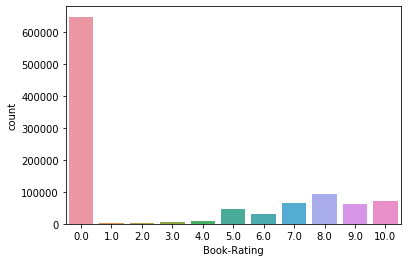

In [60]:
sns.countplot(data["Book-Rating"])

In [61]:
data["Book-Rating"].value_counts()

0.0     647294
8.0      91804
10.0     71225
7.0      66402
9.0      60778
5.0      45355
6.0      31687
4.0       7617
3.0       5118
2.0       2375
1.0       1481
Name: Book-Rating, dtype: int64

### we gonna be assuming that the rating "0" means that the book hasn't recived any ratings from the user,hence lets replace it with None

In [62]:
data.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,0.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,0.0


In [63]:
ratng=data.copy()

In [64]:
ratng["Book-Rating"].replace(0.0,None,inplace=True)

In [65]:
ratng.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0
1,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,8.0,5.0
2,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11400.0,5.0
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
4,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,41385.0,8.0


In [66]:
ratng[ratng["Book-Rating"]==0]

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
0,0195153448,Classical Mythology,Mark P. O. Morford,2002,Oxford University Press,2.0,0.0


In [67]:
ratng["Book-Rating"].iloc[0]=5

In [68]:
### lets check the distribution again

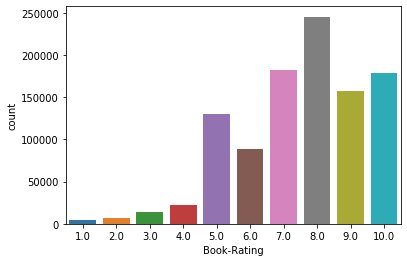

In [69]:
sns.countplot(ratng["Book-Rating"])

# Recommender 1 : Popularity Based

## To make our first recommender we gonna be making recommendations using only those books that have been rated by the users

In [70]:
rec1=pd.DataFrame(ratng.groupby(["ISBN","Book-Title","Book-Author"])["Book-Rating"].sum().sort_values(ascending=False).head(10))

In [71]:
rec1

,,,Book-Rating
ISBN,Book-Title,Book-Author,
0971880107,Wild Animus,Rich Shapero,11235.0
0316666343,The Lovely Bones: A Novel,Alice Sebold,10547.0
0385504209,The Da Vinci Code,Dan Brown,7489.0
0312195516,The Red Tent (Bestselling Backlist),Anita Diamant,5920.0
0060928336,Divine Secrets of the Ya-Ya Sisterhood: A Novel,Rebecca Wells,5760.0
0142001740,The Secret Life of Bees,Sue Monk Kidd,5187.0
059035342X,Harry Potter and the Sorcerer's Stone (Harry Potter (Paperback)),J. K. Rowling,5075.0
067976402X,Snow Falling on Cedars,David Guterson,4801.0
0446672211,Where the Heart Is (Oprah's Book Club (Paperback)),Billie Letts,4771.0


# The Above Dataframe shows the top 10 books that have received highest number of ratings and hence they are to be recommended as popular choice based on ratings sum

#                              ------------------------------------------------------------------------------------------------------------------------------

# Recommender 2 : Collabarative Filtering Based 

#### The main idea behind UB-CF is that people with similar characteristics share similar taste.
#### For example, if you are interested in recommending a movie to our friend Bob, suppose Bob and I have seen many movies together and we rated them almost identically.
#### It makes sense to think that in future as well we would continue to like similar movies and use this similarity metric to recommend movies.

In [72]:
top_index=ratng["User-ID"].value_counts().sort_values(ascending=False).head(500).index
top_index

Float64Index([ 11676.0, 198711.0, 153662.0,  98391.0,  35859.0, 212898.0,
              278418.0,  76352.0, 110973.0, 235105.0,
              ...
               76818.0,  12982.0,  96448.0,  10819.0, 164465.0, 191187.0,
              131837.0, 135458.0,    254.0,  85701.0],
             dtype='float64', length=500)

In [73]:
df=ratng[ratng["User-ID"].isin(top_index)]
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526.0,8.0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,177458.0,9.0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,110912.0,10.0
26,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,197659.0,9.0


In [74]:
df.head()

,ISBN,Book-Title,Book-Author,Year-Of-Publication,Publisher,User-ID,Book-Rating
3,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,11676.0,8.0
6,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,85526.0,8.0
10,0002005018,Clara Callan,Richard Bruce Wright,2001,HarperFlamingo Canada,177458.0,9.0
21,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,110912.0,10.0
26,0374157065,Flu: The Story of the Great Influenza Pandemic...,Gina Bari Kolata,1999,Farrar Straus Giroux,197659.0,9.0


In [75]:
idcount=df["User-ID"].value_counts()

In [76]:
idcount.shape

(500,)

In [77]:
df121=df[df["User-ID"].isin(idcount[idcount>=1500].index)]

In [78]:
zxc=df121.groupby("Book-Title")["Book-Rating"].sum().reset_index()
zxc.head()

,Book-Title,Book-Rating
0,A Light in the Storm: The Civil War Diary of ...,8.0
1,Always Have Popsicles,9.0
2,Apple Magic (The Collector's series),6.0
3,Beyond IBM: Leadership Marketing and Finance ...,5.0
4,Dark Justice,10.0


In [79]:
zxc=zxc[zxc["Book-Rating"]>200]

In [80]:
zxc["Book-Rating"].max()

347.0

In [81]:
df_mat=df121[df121["Book-Title"].isin(zxc["Book-Title"])]

In [82]:
matrix=df_mat.pivot(index="User-ID",columns="ISBN",values="Book-Rating")

In [83]:
matrix.fillna(0,inplace=True)

In [84]:
matrix

ISBN,0060158638,0060915544,0060928336,0060977477,006101351X,0061084409,0061097314,0070212570,0099201410,014028009X,0141000198,0142001740,0151001006,0151008116,0151191530,0156027321,0156028352,0312278586,0312291639,0316666343,0316693235,0316693324,0316969443,0316969680,0330332775,0330375253,0345413350,0374237131,0375727345,0380699745,0380710218,0385182449,0385299281,0385311923,038531292X,0385315236,0385324057,0385416342,0385421982,0385424728,0385424736,038550120X,0393046974,0394572343,0399133194,0399135782,0399141464,0399141707,0425047075,0425097609,0425115801,042511774X,0425158616,042516313X,042518109X,0425192032,0440194903,0440198577,044021145X,0440211727,0440214041,0440216745,0440220602,0440221315,0440221501,044022165X,0440222656,0440226430,044023722X,0440238137,0440295424,0440418321,0446350982,0446359866,0446364193,0446364495,0446364673,044651652X,0446520802,0446523569,0446605239,0446606812,0446607657,0446611085,0446611212,0446612251,0446612545,0446672211,0446676071,0446676098,0446679593,0451132378,0451139755,0451150244,0451157753,0451162072,0451202341,0517056992,0552149675,0553260618,0553280341,0553572997,059035342X,0670032379,0670880728,0670894184,0670894605,0671019074,0671617028,0671702505,0671727796,0679417796,067976402X,0679893105,069452008X,0694522899,0743412273,0743412281,0743418166,0743418174,0743477154,0785799524,080410753X,0804115613,0807281808,0821746480,0821753606,0821776037,0843950293,0886825075,0922066728,1558002669,1558176136,1586211978,184195425X,1885628501
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11601.0,0.0,10.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,5.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
11676.0,0.0,10.0,8.0,8.0,8.0,0.0,9.0,7.0,2.0,8.0,10.0,10.0,0.0,6.0,0.0,6.0,0.0,6.0,9.0,5.0,5.0,10.0,7.0,5.0,10.0,6.0,5.0,10.0,7.0,0.0,8.0,0.0,0.0,7.0,10.0,0.0,0.0,7.0,9.0,7.0,8.0,10.0,7.0,6.0,8.0,9.0,0.0,0.0,0.0,0.0,0.0,5.0,10.0,0.0,8.0,8.0,5.0,0.0,1.0,10.0,8.0,4.0,7.0,9.0,0.0,6.0,1.0,7.0,8.0,10.0,7.0,8.0,0.0,7.0,8.0,2.0,0.0,8.0,10.0,8.0,6.0,8.0,8.0,9.0,6.0,0.0,6.0,10.0,9.0,10.0,10.0,8.0,0.0,6.0,2.0,8.0,9.0,0.0,8.0,0.0,10.0,7.0,10.0,8.0,5.0,8.0,10.0,8.0,8.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,9.0,7.0,8.0,8.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0
16795.0,0.0,0.0,6.0,0.0,0.0,0.0,9.0,9.0,0.0,0.0,0.0,10.0,0.0,10.0,0.0,0.0,0.0,0.0,9.0,10.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,0.0,7.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,8.0,9.0,0.0,8.0,7.0,5.0,10.0,6.0,0.0,7.0,9.0,0.0,5.0,9.0,9.0,8.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,9.0,0.0,0.0,10.0,7.0,9.0,0.0,0.0,0.0,9.0,8.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,7.0,8.0,10.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,9.0,0.0,0.0,9.0,0.0,0.0,0.0,7.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
23768.0,0.0,8.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,6.0,0.0,7.0,0.0,0.0,7.0,7.0,0.0,0.0,5.0,0.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,0.0,0.0,0.0,0.0,7.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,8.0,7.0,0.0,7.0,0.0,0.0,0.0,9.0,0.0,0.0,0.0,10.0,0.0,0.0,9.0,0.0,8.0,8.0,0.0,0.0,0.0,0.0,10.0,10.0,0.0,0.0,10.0,6.0,0.0,0.0,8.0,10.0,0.0,0.0,0.0,7.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,7.0,10.0,10.0,9.0,9.0,7.0,0.0,0.0,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0,6.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
26544.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,0.0,0.0,

## Importing the library to calculate cosine similiarity between the users

In [85]:
from sklearn.metrics.pairwise import cosine_similarity


In [86]:
cos_sim = cosine_similarity(matrix)
np.fill_diagonal(cos_sim,0)        # zero here means that both ids are same,it should be 1 here but i am using 0 so as to ease further coding process
rec_cos=pd.DataFrame(cos_sim,index=matrix.index)
rec_cos.columns=matrix.index
rec_cos.head()

User-ID,11601.0,11676.0,16795.0,23768.0,26544.0,35859.0,36606.0,36836.0,52584.0,55492.0,60244.0,69697.0,73394.0,76352.0,78783.0,98391.0,98741.0,102967.0,110973.0,123981.0,129358.0,135149.0,148744.0,153662.0,171118.0,172742.0,175003.0,177458.0,182085.0,185233.0,189334.0,189835.0,190925.0,198711.0,204864.0,212898.0,213350.0,226545.0,227447.0,230522.0,231210.0,232131.0,234623.0,235105.0,238781.0,242824.0,245963.0,269566.0,278418.0
User-ID,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
11601.0,0.000000,0.306561,0.244279,0.216970,0.381261,0.216294,0.172457,0.324889,0.318449,0.334795,0.219237,0.210819,0.236177,0.243883,0.260934,0.058742,0.325008,0.366538,0.187500,0.176832,0.000000,0.177646,0.361112,0.209871,0.329308,0.366640,0.334061,0.100419,0.207517,0.155675,0.127735,0.000000,0.200119,0.388770,0.296754,0.170747,0.213241,0.089352,0.269002,0.340327,0.443664,0.302815,0.312870,0.330350,0.142639,0.059118,0.186308,0.273127,0.128759
11676.0,0.306561,0.000000,0.550833,0.568662,0.470131,0.558255,0.476117,0.489055,0.527532,0.452929,0.522868,0.326956,0.477864,0.532284,0.543054,0.127730,0.448406,0.596777,0.460479,0.400070,0.032762,0.484140,0.418302,0.506217,0.304703,0.429051,0.500757,0.191496,0.408562,0.500196,0.258746,0.006416,0.333889,0.539532,0.496542,0.320465,0.263221,0.217289,0.504338,0.573356,0.405430,0.553141,0.426873,0.499034,0.421932,0.255972,0.345384,0.474769,0.377648
16795.0,0.244279,0.550833,0.000000,0.485920,0.358639,0.557508,0.329460,0.397706,0.479792,0.399907,0.472296,0.275740,0.374110,0.512520,0.490517,0.142365,0.443799,0.479009,0.448426,0.390724,0.074329,0.550968,0.447166,0.553405,0.124526,0.336216,0.486774,0.333509,0.422529,0.530863,0.388303,0.045489,0.224537,0.481686,0.381821,0.253829,0.114845,0.345543,0.443055,0.590324,0.410982,0.382966,0.265290,0.390681,0.351115,0.200587,0.267572,0.414671,0.425980
23768.0,0.216970,0.568662,0.485920,0.000000,0.448683,0.560100,0.386305,0.388024,0.536265,0.368128,0.549419,0.254276,0.422168,0.545795,0.451927,0.098915,0.456755,0.578890,0.472624,0.405763,0.078117,0.540233,0.451091,0.487111,0.265707,0.432379,0.471745,0.259324,0.338587,0.427204,0.232964,0.186446,0.378913,0.589999,0.526905,0.278065,0.266538,0.212129,0.380854,0.543499,0.517805,0.564599,0.327823,0.466103,0.530950,0.177346,0.284972,0.424418,0.330269
26544.0,0.381261,0.470131,0.358639,0.448683,0.000000,0.397056,0.255219,0.305593,0.488173,0.447886,0.330851,0.196396,0.266127,0.483788,0.339492,0.000000,0.500649,0.558293,0.366122,0.347673,0.000000,0.377683,0.369964,0.404851,0.229299,0.394894,0.422667,0.186449,0.282310,0.300971,0.239608,0.110158,0.156220,0.483851,0.326357,0.366814,0.226612,0.234688,0.276438,0.430231,0.380615,0.452244,0.411561,0.368665,0.223726,0.389801,0.290878,0.458933,0.387989


#### Validating our result

In [87]:
df_mat[df_mat["User-ID"]==16795.0][["Book-Title","Book-Rating"]].head()

,Book-Title,Book-Rating
9398,The Beach House,9.0
17950,Life of Pi,10.0
19862,A Painted House,8.0
21656,The Secret Life of Bees,10.0
24252,The Lovely Bones: A Novel,10.0


In [88]:
df_mat[df_mat["User-ID"]==135149.0][["Book-Title","Book-Rating"]].head()

,Book-Title,Book-Rating
9506,The Beach House,8.0
20146,A Painted House,8.0
24804,The Lovely Bones: A Novel,10.0
26696,The Firm,8.0
32119,Postmortem,8.0


### Building a function to show top 10 users that are similiar to input user

In [111]:
def sim(userid,n):          # userid is the id for which recommendations has to be made, n represents total no. of similiar users wanted 
    print(np.array(rec_cos[userid].sort_values(ascending=False).head(n).index))

In [100]:
print(np.array(rec_cos[98391.0].sort_values(ascending=False).head(10).index))

[175003. 177458. 123981. 129358.  73394. 189334.  16795.  78783. 231210.
  55492.]


In [112]:
sim(98391.0,20)        # .0 has to be added in front of every id as it is working column wise instead of row wise

[175003. 177458. 123981. 129358.  73394. 189334.  16795.  78783. 231210.
  55492.  11676. 234623.  69697. 230522. 172742.  23768. 227447. 226545.
 269566. 190925.]


In [311]:
def book_recommender():              # userid is the id for which recommendations has to be made, n represents total no. of similiar users wanted 
    print()
    print()
    userid = int(input("Enter the user id to whom you want to recommend : "))
    print()
    print()
    n= int(input("Enter how many books you want to recommend : "))
    print()
    print()
    arr=np.array(rec_cos[userid].sort_values(ascending=False).head(5).index)
    recom_arr=[]

    for i in arr:
        recom_arr.append(df_mat[df_mat["User-ID"]==i][["Book-Title","Book-Rating"]].sort_values(by="Book-Rating",ascending=False))
    
    return(pd.Series(recom_arr[0].append([recom_arr[1],recom_arr[2],recom_arr[3],recom_arr[4]]).groupby("Book-Title")["Book-Rating"].mean().sort_values(ascending=False).index).head(n))

In [321]:
book_recommender()

Enter the user id to whom you want to recommend :  129358


Enter how many books you want to recommend :  10


0    Harry Potter and the Sorcerer's Stone (Harry P...
1                                       Cause of Death
2                            The Lovely Bones: A Novel
3                              The Secret Life of Bees
4                                       A Time to Kill
5                                     The Color Purple
6    The Perfect Storm : A True Story of Men Agains...
7                                Bridget Jones's Diary
8                                         The Alienist
9                        The Bridges of Madison County
Name: Book-Title, dtype: object

# This is only a basic recommender system and much more work still has to be done 